# Propser Loan Data Analysis
## by Jimmy Le

## Preliminary Wrangling

This notebook explores a dataset containing peer-to-peer loan information of approximately 113,000 loans from Prosper Funding LLC.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

%config InlineBbackend.figure_format='retina'

In [2]:
# loan in dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosper-loan-data/prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features.  Most variables are numeric and categorical in nature.

The dataset features can be split into two main categories:

1. Borrower information
2. Loan performance information

### What is/are the main feature(s) of interest in your dataset?

As an investor, I'm most interested in figuring out which borrower features are best for predicting the highest rate of return.  

How closely did the estimated loan performance match the actual loan performance?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I suspect the following borrower features will have the largest effect on the performance of the loan:

1. __IncomeRange__ - The income range of the borrower at the time the listing was created.
2. __DebToIncomeRatio__ - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
3. __CreditGrade__ - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
4. __ProsperRating (Alpha)__ - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

The performance of the loan can be determined by the following features:

1. __EstimatedReturn__ - The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.
2. __ActualReturn__ - To see how well our note performed vs the Estimated Returns, we will derive this feature based on how Prosper calculates their Annualized Net Returns.  

## Univariate Exploration

### Estimated Return
Let's start by getting a closer look at the estimated returns.

In [8]:
df.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

It appears we have quite a few empty cells since the total number of rows is over 100,000.  

The range of estimated returns is -18% to 28%.

From the quartile distribution I expect to see a possible right skewed distribution plot.

Let's drop the null rows and proceed with a histogram plot.

In [9]:
# drop null rows without an estimated return
df.EstimatedReturn.dropna(axis = 0, inplace = True)

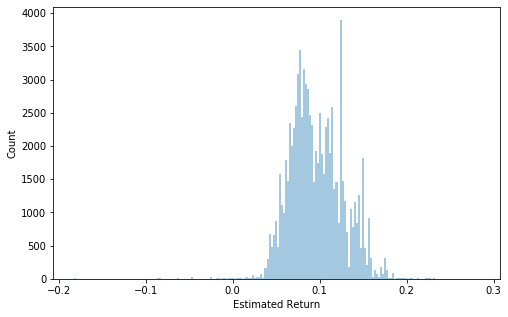

In [10]:
plt.figure(figsize = [8,5])
sns.distplot(df.EstimatedReturn, kde = False, bins = 200)
plt.xlabel('Estimated Return')
plt.ylabel('Count');

It appears most of our loans have an estimated return between 0% and 20%, let's zoom in on this distribution.

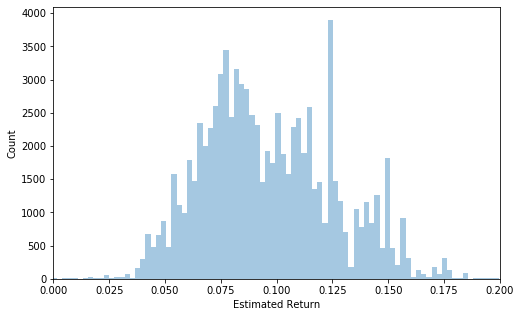

In [11]:
plt.figure(figsize = [8,5])
sns.distplot(df.EstimatedReturn, kde = False, bins = 200)
plt.xlim(0, .2)
plt.xlabel('Estimated Return')
plt.ylabel('Count');

Our hypothesis appears to be correct as the distribution is right skewed.  

It also looks like there are some peaks in some standard values such as 5%, 7.5%, 12.5%, and 15%.  Most curiously the largest bin falls right around 12.5%.

Let's try to calculate the actual returns and see how they compare to the estimated returns.

### Actual Returns
Let's try to calculate the actual returns by using the remaining loan performance (LP) variables.

From [Prosper's FAQs:](https://prosper.zendesk.com/hc/en-us/articles/360001288366-Frequently-Asked-Questions-about-Historical-Returns): 

> We calculated Historical Return for loans originated through Prsoper as follows: ...(a) the sum of the Interest Paid, plus Late Fees, minus Servicing Fees, minus Collection Fees, in each case on active loans, plus Net Recoveries on charged-off or defaulted loans, plus Net Debt Sale Proceeds on sold loans, minus Gross Principal Losses; divided by (b) the sum of the Principal Balances Outstanding on active loans at the end of each day since origination.  We then annualize the result to get the “Historical Return” for the Group.* 

![](https://prosper.zendesk.com/hc/article_attachments/360002576966/mceclip0.png)

To simplify this calculation for exploratory purposes, we will only divide by the original loan amount.  We will run into other categorical issues if we try to determine the current rate of return for current loans vs completed loans etc.

$$Actual Returns = 1 + \frac{Customer Payments - Original Loan Amount - (Service Fees + Collection Fees + Net Principal Losses)}{Original Loan Amount}$$

In [12]:
# simplified actual return formula
df['ActualReturns'] = df.LP_CustomerPayments - df.LoanOriginalAmount - (df.LP_ServiceFees + df.LP_CollectionFees + df.LP_NetPrincipalLoss)
df['ActualReturns'] = 1 + (df.ActualReturns / df.LoanOriginalAmount)

In [13]:
df.ActualReturns.describe()

count    113937.000000
mean          0.531620
std           0.621164
min          -1.000650
25%           0.074989
50%           0.415864
75%           1.119834
max           2.602880
Name: ActualReturns, dtype: float64

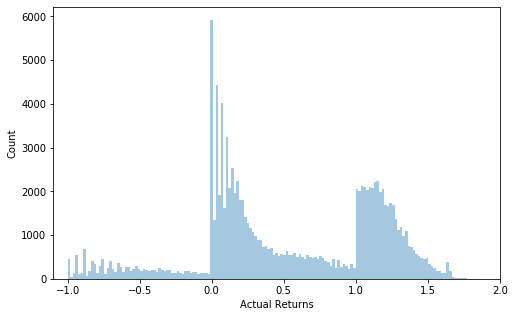

In [14]:
# plot distribution
plt.figure(figsize = [8,5])
sns.distplot(df.ActualReturns, kde = False, bins = 200)
plt.xlim(-1.1, 2)
plt.xlabel('Actual Returns')
plt.ylabel('Count');

It's interesting to see the wide range of values of actual returns.  There are some loans where it appears that the borrower never made a payment which gives us the minimum of losing 100% of the investment.  On the other end of the spectrum, it looks like most loans drop off after about 170% of the original loan amount.

As mentioned previously, to simplify the visualization, this calculation is not annualized based on the length of the loans, so this is not quite an apples to apples comparison with the Estimated Return which is annualized.

Since there appears to be differnt modes to the distribution, let's see how the actual returns differ by the loan status:

/Users/lejimmy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


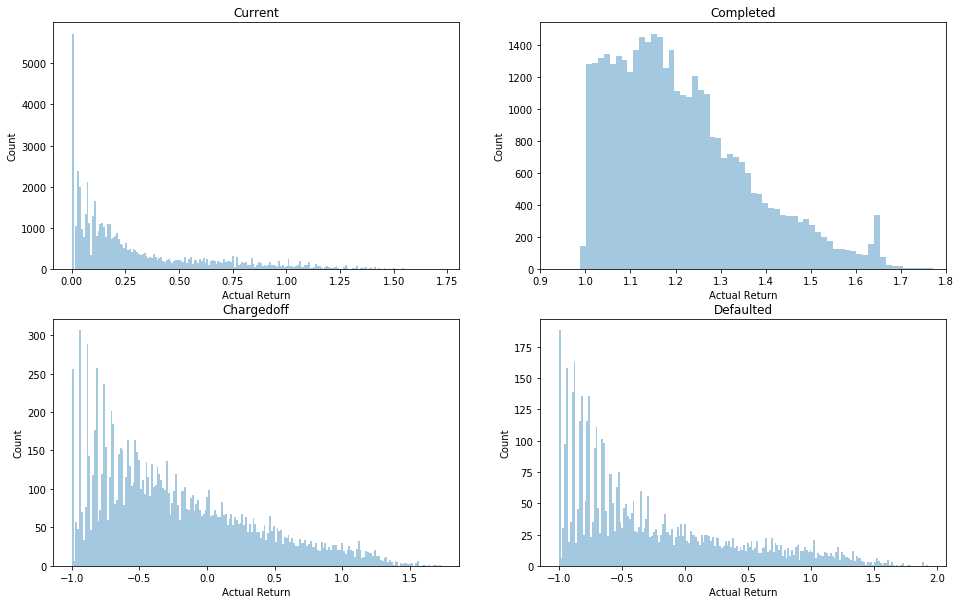

In [15]:
variables = ['Current', 'Completed', 'Chargedoff', 'Defaulted']

plt.figure(figsize = [16, 10])

for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    
    sns.distplot(df.query('LoanStatus == "{}"'.format(variables[i])).ActualReturns, 
                 kde = False, bins = 200)
    
    plt.xlabel('Actual Return')
    plt.ylabel('Count')
    plt.title(variables[i])
    
plt.subplot(2, 2, 2)
plt.xlim(.9, 1.8);

For the current loans, there appears to be a large number of loans that have just begun or have not been fully funded yet.

It makes sense that the completed loans are offering a return greater than 100% since we have to divide this by 3 or 5 years to get the annual return.

For loans that have defaulted or have been chargedoff, it makes sense that a majority of them show negative returns up to 100%.  Meaning that the borrower never made a payment or the fees resulted in the investor losing the entire principal.

### Prosper Credit Grade
Let's see if there is a similar or mirrored distribution for the borrower's prosper/credit grade.

In [16]:
df['ProsperRating (Alpha)'].describe(), df['ProsperRating (Alpha)'].value_counts()

(count     84853
 unique        7
 top           C
 freq      18345
 Name: ProsperRating (Alpha), dtype: object, C     18345
 B     15581
 A     14551
 D     14274
 E      9795
 HR     6935
 AA     5372
 Name: ProsperRating (Alpha), dtype: int64)

In [17]:
df['CreditGrade'].describe(), df['CreditGrade'].value_counts()

(count     28953
 unique        8
 top           C
 freq       5649
 Name: CreditGrade, dtype: object, C     5649
 D     5153
 B     4389
 AA    3509
 HR    3508
 A     3315
 E     3289
 NC     141
 Name: CreditGrade, dtype: int64)

From the feature descriptions, it looks like Prosper transitioned to a a "Prosper Rating" to differentiate themselves from the industry standard "Credit Grade.

For our purposes, we'll replace the Credit Grade of No Credit (NC) with High Risk (HR) and combine this column with the Prosper Rating.

In [18]:
# replace NC with HR
df['CreditGrade'].replace('NC', 'HR', inplace = True)

# fill NA with empty strings
df['ProsperRating (Alpha)'].fillna("", inplace = True)
df['CreditGrade'].fillna("", inplace = True)

# combine credit ratings
df['ProsperRatingCombined'] = df['ProsperRating (Alpha)'] + df['CreditGrade']

# drop rows with no credit ratings
df = df.query(' ProsperRatingCombined != ""')

# check values
df['ProsperRatingCombined'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10584
AA     8881
Name: ProsperRatingCombined, dtype: int64

We could have a potential issue with two 'A' grades combining to make an 'AA' grade.  Let's double check the number of values before and after to make sure we didn't erroneously create 'AA' grades.

In [19]:
# are the number of A and AA ratings the same before and after combining the columns?
(df['ProsperRatingCombined'] == 'A').sum() == (df.CreditGrade == 'A').sum() + (df['ProsperRating (Alpha)'] == 'A').sum() and \
(df['ProsperRatingCombined'] == 'AA').sum() == (df.CreditGrade == 'AA').sum() + (df['ProsperRating (Alpha)'] == 'AA').sum()

True

Ok great, we didn't introduce any erroneous data since there were no rows with an 'A' rating for both their Credit Grade and Prosper Rating.

Let's plot!

In [20]:
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['ProsperRatingCombined'] = df['ProsperRatingCombined'].astype(ordered_var)

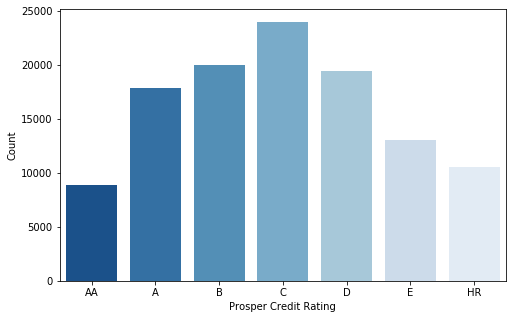

In [21]:
plt.figure(figsize = [8, 5])
sns.countplot(data = df, x = 'ProsperRatingCombined', palette = "Blues_r")
plt.xlabel('Prosper Credit Rating')
plt.ylabel('Count');

It's surprising to see the distribution of credit ratings quite normally distributed since the distribution of estimated returns are skewed to the right.

Let's continue our exploration by looking at a couple of the underwriting features for borrowers to be assigned these Credit Ratings.  We'll start with taking a look at Income Ranges.

### Income Range

In [22]:
df.IncomeRange.value_counts()

$25,000-49,999    32152
$50,000-74,999    31005
$100,000+         17321
$75,000-99,999    16899
Not displayed      7741
$1-24,999          7261
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

Let's combine the "Not employed", "Not displayed", and "$0" categories together.

In [23]:
df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [24]:
ordinal_rating = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_var)

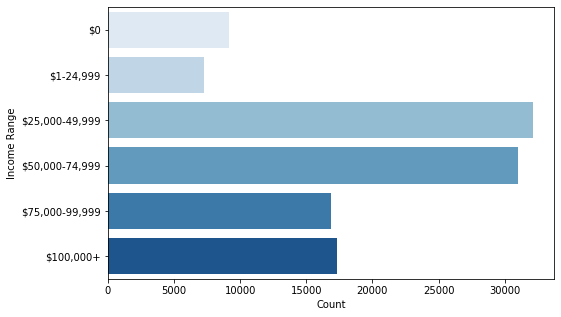

In [25]:
plt.figure(figsize = [8, 5])
sns.countplot(data = df, y = 'IncomeRange', palette = "Blues")
plt.ylabel('Income Range')
plt.xlabel('Count');

Its interesting to see that the number of borrowers for the \\$25k-49k range is the same as the \\$50k-74k range.  The amount of borrowers in the \\$75k-100k range is the same as all borrowers that have an income of over \\$100k.

Of course your income is only part of the picture, let's see what the borrower's Debt to Income Ratio is like to make sure they are not overleveraged.

### Debt to Income Ratio

In [26]:
df.DebtToIncomeRatio.describe()

count    105263.000000
mean          0.275976
std           0.551811
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

/Users/lejimmy/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lejimmy/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


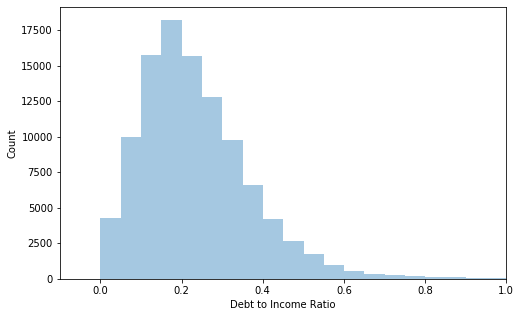

In [27]:
plt.figure(figsize = [8,5])
sns.distplot(df.DebtToIncomeRatio, kde = False, bins = 200)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count');

It appears that most borrowers who apply for a loan have a debt to income ratio around 20%.  The distribution appears to follow a gamma density curve distribution as follows:

![](https://www.itl.nist.gov/div898/handbook/eda/section3/gif/gampdf4.gif)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

To summarize our variables of interest, we looked at income, debt to income ratios, credit ratings, estimated returns and actual returns for the data set.

We saw relatively normal distributions for income, debt to income, credit ratings, and estimated returns.  However,  trying to calculate the real time actual returns proved to be difficult.

While doing some research for this dataset, I stumbled across a few blog posts discussing how Prosper has updated how they calculate their annualized returns resulting in lower returns.

On the [LendAcademy website](https://www.lendacademy.com/prosper-corrects-annualized-return-calculation/), the authors conlude that:

>In the past p2p lending investors have relied on different ways to calculate returns outside of what the platforms provide. This is because calculating returns is complex and there is no consensus on what method is best.

In the discussion on [LendAcademy](https://www.lendacademy.com/prosper-corrects-annualized-return-calculation/), investors shared their personal anecdotes of their return estimates dropping nearly in half.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We saw that from our simplified actual returns formula, that the values returned vary greatly between different loan status.

To tidy up our visualizations, we combined several rows for different visuals where the categories appeared to be redundant.

## Bivariate Exploration

### Quantitative vs. Quantitative

First, let's look at the pairwise correlation between the numeric features we are interested in.

In [28]:
numeric_vars = ['DebtToIncomeRatio', 'ActualReturns', 'EstimatedReturn']
categoric_vars = ['IncomeRange', 'ProsperRatingCombined']

/Users/lejimmy/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


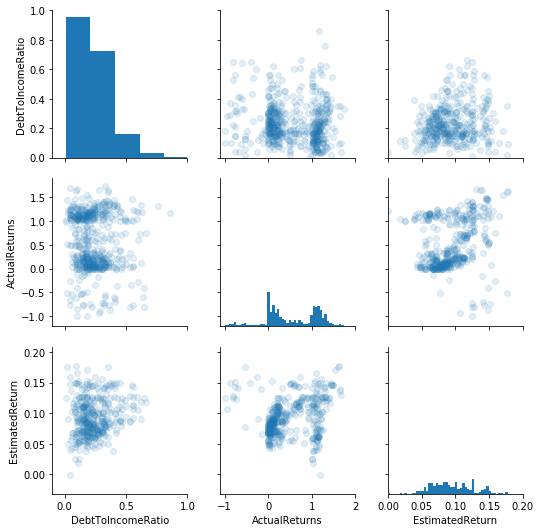

In [29]:
# plot matrix with 0.5% of data points
samples = np.random.choice(df.shape[0], int(df.shape[0]*.005), replace = False)
df_samp = df.loc[samples,:]

# pair grid
g = sns.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 50)
g.map_offdiag(plt.scatter, alpha = 1/8)

# set axis limits
g.axes[0,0].set_ylim(0,1)
g.axes[0,0].set_xlim(-.1,1)
g.axes[0,1].set_xlim(-1.1,2)
g.axes[0,2].set_xlim(0,.2);


From the univariate exploration, we have a good undertanding regarding where most of the values appear.  By limiting the axis values, we are able to prevent outliers from skewing the plot.

Surprisingly, there doesn't appear to be any correlation between the estimated returns and the actual returns we calculated.  We may have to query only the completed loans before a correlation is clear.

There doesn't appear to be a correlation between any of the other numeric variables either.

You may intuitively expect borrowers with a high debt to income ratio to be riskier and thus have a lower rate of return - but that doesn't seem to be the case.

### Quantitative vs. Qualitative

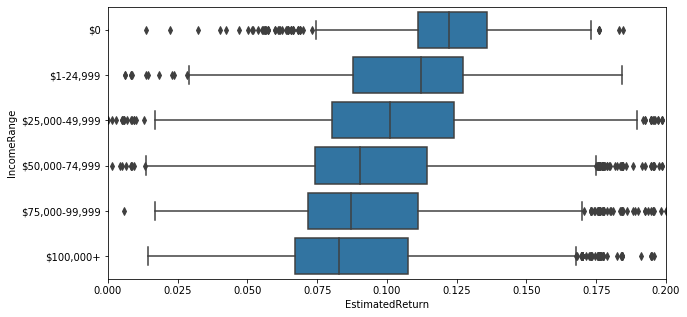

In [30]:
plt.figure(figsize = [10, 5])

base_color = sns.color_palette()[0]
sns.boxplot(data = df, y = 'IncomeRange', x = 'EstimatedReturn',
            color = base_color)

plt.xlim(0,.2);

From this boxplot, we're able to clearly see that as the borrowers income increases, the estimated return decreases.

We can speculate the reasoning that as income decreases, the ability to repay the loan also decreases, so to adjust for the higher risk, the interest rate for the loan also increases.

## Qualitative vs. Qualitiative

Let's continue to explor this thread by also plotting the credit score along with the income range.

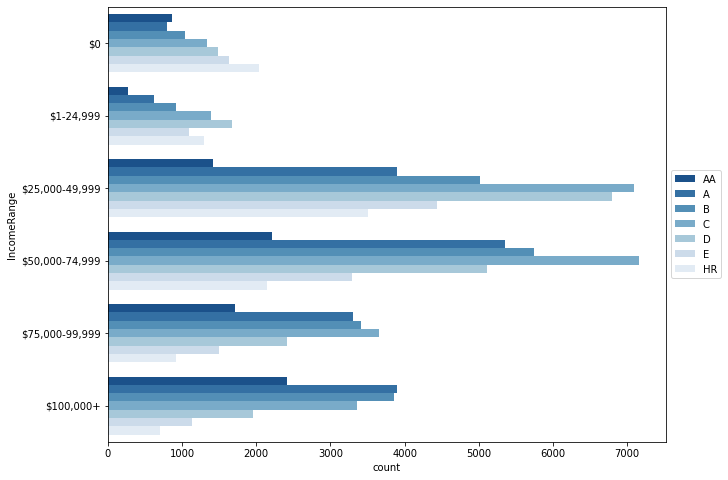

In [31]:
plt.figure(figsize = [10,8])

ax = sns.countplot(data = df, y = 'IncomeRange', hue = 'ProsperRatingCombined',
                   palette = 'Blues_r')

ax.legend(bbox_to_anchor = (1,.5),  loc = 6);

From this clustered bar chart, we can see the trend of higher incomes equate to a higher credit rating qualifying the borrower for the best (lowest) interest rates.

Having an income of \\$75k+ doesn't automatically guarantee the best credit ratings.  I'm curious to see in the multivariate analysis what other factors play a big role in determining one's credit rating.

Conversely, it also appears that in the \\$0 income range, there are a high amount of "AA" loans relative to the \\$1-25k income range.  I hypothesize you must have other significant assets to receive the highest credit rating without any income!

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!